#ZOMATO DATA ANALYSIS PROJECT

step-1 import libraires

In [ ]:
#IMPOTING LIBRIARIES NUMPY SEABORN METAPOTLIB PLOTLY PANDAS

In [ ]:
pandas is used for data manipulation and analysis
numpy is used for numerical operations
matplotlib .pyplot and  seaborn is used for data visualization

In [5]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

step- 2 create the data frame

In [11]:
dataframe=pd.read_csv("Zomato data .csv")
dataframe


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# conver the data type of rating column

In [14]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#datacleaning

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#type of restaurant

In [16]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


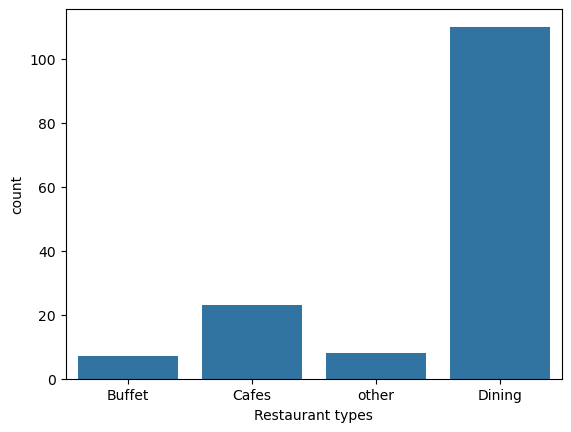

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Restaurant types')
plt.show()


#majority of the customers falls in dining

Text(0, 0.5, 'votes')

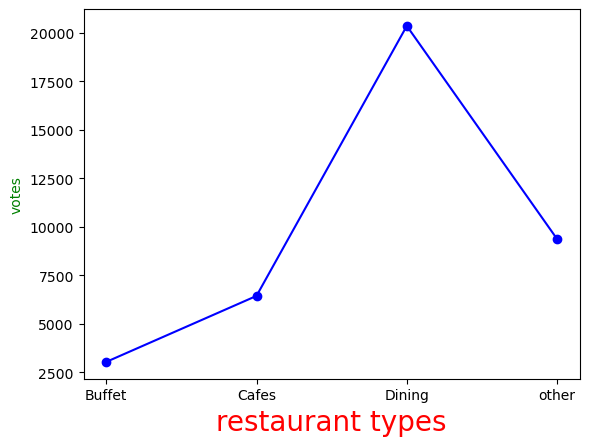

In [22]:
grouped_data=dataframe.groupby(['listed_in(type)'])['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='blue',marker='o')
plt.xlabel('restaurant types',c='red',size=20)
plt.ylabel('votes',c='green',size=10)

#dining res rec maximum vote

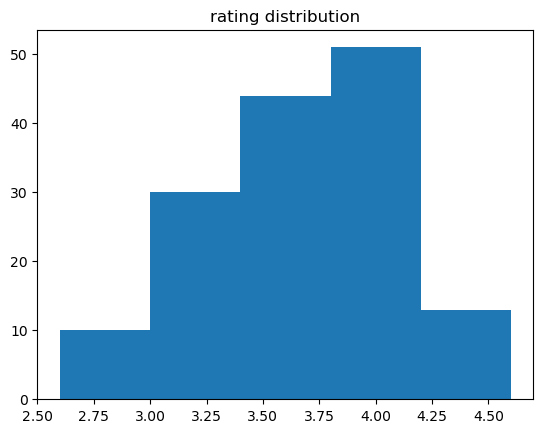

In [24]:
plt.hist(dataframe['rate'],bins=2)
plt.title('rating distribution')
plt.show()

#majority res receive rating between 2 -5

# average order submitted by couple

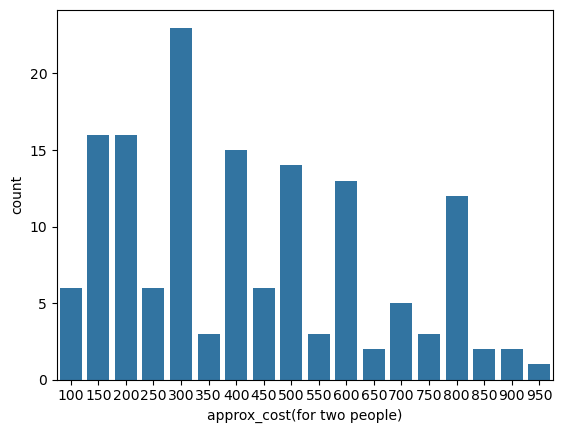

In [29]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

conclusion-majority of couples prefer res with approximate cost of 300 rupees 

# which mode receive maximum rating

In [30]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


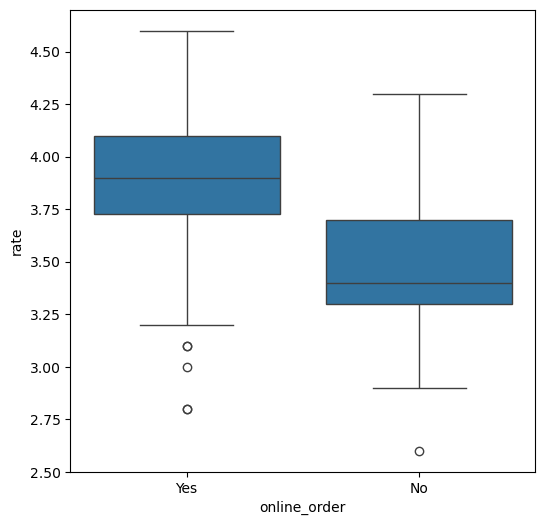

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)
plt.show()

#online mode receives more rating rather than offline

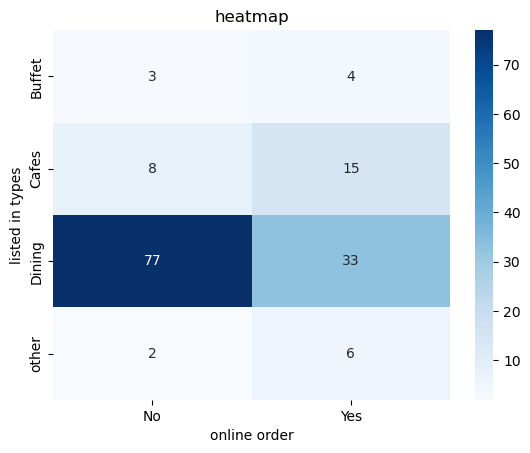

In [39]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="Blues",fmt='d')
plt.title('heatmap')
plt.xlabel("online order")
plt.ylabel('listed in types')
plt.show()

#conclusions- dining receives offline orders whereas cafe receives online order.this shows that clients prefers offline order in restaurants and 
prefer online more in via cafes